In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astroML import stats
from tqdm.notebook import tqdm

In [2]:
#markov chain will be a list
N = int(1e5)
x = np.zeros(N)

p_cle_cle = 0.9
p_cle_clo = 0.5
p_clo_cle = 0.1
p_clo_clo = 0.5

# 0 will be cloudy 1 will be clear

  0%|          | 0/100000 [00:00<?, ?it/s]

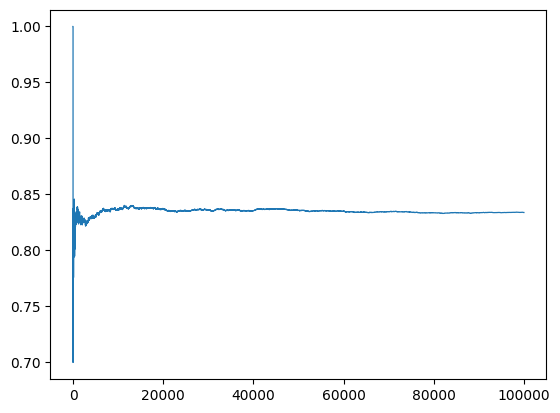

In [57]:
proposal = 0
current = proposal

for i in tqdm(range(N)):
    if proposal == 0:
        accepted = np.random.rand() < p_cle_clo #if true my next day will be clear, if false it will stay cloudy
        if accepted:
            current = 1
            
    if proposal == 1:
        accepted = np.random.rand() < p_clo_cle #if true my next day will be cloudy, if false it will stay clear
        if accepted:
            current = 0
    x[i] = current
    proposal = current

days = np.arange(1,N+1)
sunny = np.cumsum(x)/days
plt.plot(days, sunny, lw = .9);

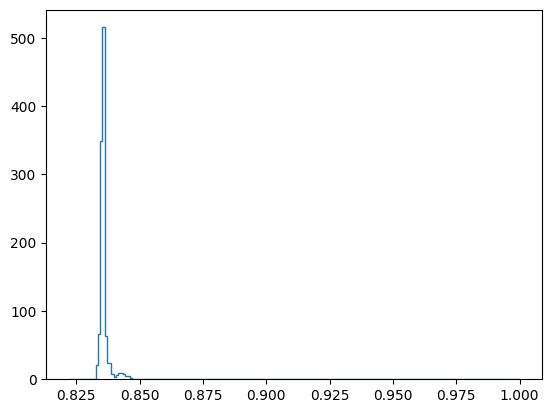

In [38]:
plt.hist(sunny, bins=200, density=True, histtype = 'step');

In [73]:
#statistics
m = np.mean(sunny)
med = np.median(sunny)
sigma = np.std(sunny)
sigma_med = stats.sigmaG(sunny)

print(round(m,5), round(sigma,5))
print(round(med,5), round(sigma_med,5))

#which one is better and why?

0.83485 0.00336
0.83511 0.00175


Remember! the first guesses are to throw away, this is due to the **burn in phase**, we can chop off the non stationary part of the process

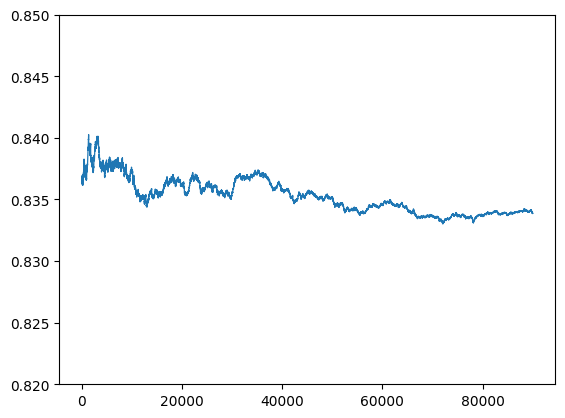

In [65]:
plt.plot(sunny[int(1e4):], lw = .9)
plt.ylim(0.82, 0.85);

And so our distribution becomes

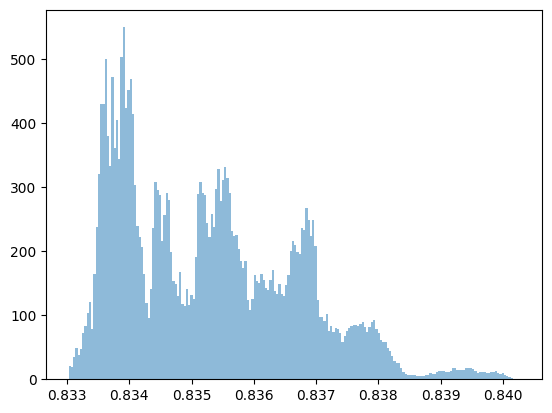

In [64]:
plt.hist(sunny[int(1e4):], bins=200, density=True, alpha = 0.5);